### Fourier Transform removing frequencies

In [1]:
import sys 
sys.path.append("../data/")
sys.path.append("../artifacts/")
from load_EEGs_1c import EEGDataset1c
from synthetic_artifacts_1c import SyntheticArtifiacts1c 
import stacklineplot
import torch
import torch.utils.data as data
import scipy
from scipy.fftpack import fft, ifft
import numpy as np

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 3]

In [73]:
files_csv = "../data/dataset_csv/sample_file.csv"
dataset = EEGDataset1c(files_csv, max_num_examples=100, length=784)
# dataset = EEGDataset1c(files_csv, max_num_examples=100, length=784*4)

In [74]:
x = dataset[0].numpy()

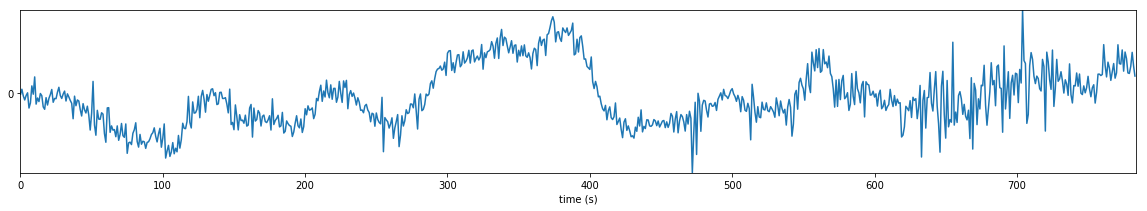

In [75]:
stacklineplot.stackplot(x)

In [142]:
# stacklineplot.stackplot(y, yscale=4)

In [168]:
import torch

In [192]:
def remove_high_freq(x):
    y = fft(x)
    y[:, x.shape[-1] // 10: x.shape[-1] // 2 + x.shape[-1] // 2] = 0
    return ifft(y).real

def remove_low_freq(x):
    y = fft(x)
    y[:, :x.shape[-1] // 8] = 0
    y[:, -x.shape[-1] // 8: ] = 0
    return ifft(y).real
def np_mse(a, b):
    return np.square(a - b).mean()

def get_diff_vary_freq(x, recon_x, criterion=np_mse):
    diff = criterion(x, recon_x)
    diff_low_freq = criterion(remove_high_freq(x), remove_high_freq(recon_x))
    diff_high_freq = criterion(remove_low_freq(x), remove_low_freq(recon_x))
    return diff, diff_low_freq, diff_high_freq

def get_diff_vary_freq_batch(batch_x, batch_recon_x, criterion=np_mse):
    assert(batch_x.shape[0] == batch_recon_x.shape[0])
    diff, diff_low_freq, diff_high_freq = [], [], []
    for i in range(batch_x.shape[0]):
        x = batch_x[i]
        recon_x = batch_recon_x[i]
        cur_diff = criterion(x, recon_x)
        cur_diff_low_freq = criterion(remove_high_freq(x), remove_high_freq(recon_x))
        cur_diff_high_freq = criterion(remove_low_freq(x), remove_low_freq(recon_x))
        diff.append(cur_diff)
        diff_low_freq.append(cur_diff_low_freq)
        diff_high_freq.append(cur_diff_high_freq)
    diff = sum(diff) / len(diff)
    diff_low_freq = sum(diff_low_freq) / len(diff_low_freq)
    diff_high_freq = sum(diff_high_freq) / len(diff_high_freq)
    return diff, diff_low_freq, diff_high_freq
    


    

In [193]:
get_diff_vary_freq(dataset[0].numpy(), dataset[1].numpy())

(154682.55, 41602.945, 17127.54)

In [194]:
y = fft(x)
# y[:, 100:] = 0 # remove high frequency
# y[:, :100] = 0 # remove low frequency

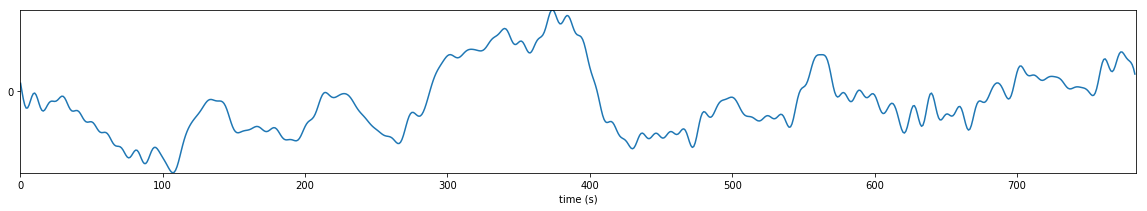

In [195]:
x_hat = remove_high_freq(x)
stacklineplot.stackplot(x_hat)

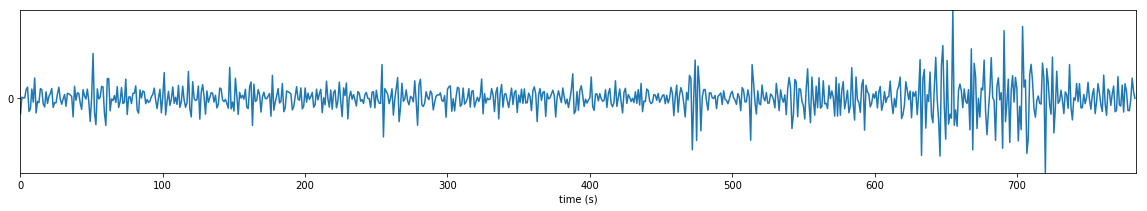

In [196]:
x_hat = remove_low_freq(x)
stacklineplot.stackplot(x_hat)

In [197]:
x_hat

array([[-1.05103516e+02,  4.92141867e+00, -6.56746775e-02,
         7.05945194e-01,  5.32787819e+01,  6.86227036e+01,
        -8.57398834e+01, -6.90172424e+01,  5.65635719e+01,
        -2.62418098e+01,  1.26702454e+02, -9.48566284e+01,
        -2.08761101e+01, -2.98189335e+01,  5.90632553e+01,
         5.34025307e+01, -3.65828743e+01, -5.68027267e+01,
         3.92005615e+01, -3.47441254e+01,  9.89511776e+00,
         2.85251217e+01,  6.00250092e+01, -5.92364006e+01,
        -2.94904690e+01, -3.10740318e+01,  2.61208801e+01,
         6.81513214e+01, -8.22313786e+00, -3.95039940e+01,
        -5.82196569e+00,  2.23136730e+01, -5.23191948e+01,
         2.96194439e+01,  2.68820324e+01,  1.92573223e+01,
         9.24986267e+00, -1.19477165e+02,  7.38980560e+01,
        -1.45787630e+01,  3.29703712e+01,  2.85999851e+01,
        -3.30976982e+01, -7.19023590e+01,  5.26624527e+01,
         1.35558844e+01, -6.09990311e+00,  5.63783302e+01,
        -1.96301842e+01, -1.48501678e+02,  4.72460300e-0